In [220]:
using Distributions
using Random
using StatsBase
using StatsPlots
default(fmt=:png)

function MyLogNormal(m, s)
    σ² = log(1 + s^2/m^2)
    μ = log(m) - σ²/2
    LogNormal(μ, √σ²)
end

distname(dist) = replace(string(dist), r"{[^\}]*}"=>"")

function distname(dist::LocationScale)
    μ, σ, ρ = params(dist)
    s = σ != 1 ? "$σ " : ""
    "$μ + $(s)$(distname(ρ))"
end

distname (generic function with 2 methods)

In [202]:
function plot_tstats(; distx, m, disty, n, L=10^6, kwargs...)
    Xtmp = [Vector{eltype(distx)}(undef, m) for _ in 1:Threads.nthreads()]
    Ytmp = [Vector{eltype(disty)}(undef, n) for _ in 1:Threads.nthreads()]
    T = Vector{Float64}(undef, L)
    DF = similar(T)
    Pval = similar(T)
    Threads.@threads for i in 1:L
        tid = Threads.threadid()
        X = rand!(distx, Xtmp[tid])
        Y = rand!(disty, Ytmp[tid])
        X̄ = mean(X)
        Ȳ = mean(Y)
        sx2 = var(X)
        sy2 = var(Y)
        t = (X̄ - Ȳ)/√(sx2/m + sy2/n)
        T[i] = t
        df = (sx2/m + sy2/n)^2 / ((sx2/m)^2/(m-1) + (sy2/n)^2/(n-1))
        DF[i] = df
        pval = 2ccdf(TDist(df), abs(t))
        Pval[i] = pval
    end
    
    DFmin, DFmax = minimum(DF), maximum(DF)
    _ecdfPval = ecdf(Pval)
    ecdfPval(x) = _ecdfPval(x)
    
    println(distname(distx))
    @show m mean(distx) std(distx)
    println()
    println(distname(disty))
    @show n mean(disty) std(disty)
    println()
    @show DFmin DFmax
    @show ecdfPval(0.05)
    
    P = stephist(T; norm=true, label="t-statistics", lw=1.5, kwargs...)
    plot!(TDist(DFmax); label="", ls=:dash)
    plot!(TDist(DFmin); label="", ls=:dashdot)
    
    T2 = T .^ 2
    _ecdfT2 = ecdf(T2)
    ecdfT2(x) = _ecdfT2(x)
    Q = plot(ecdfT2, 0, 20; label="t²", lw=1.5)
    plot!(x -> cdf(FDist(1, DFmax), x), 0, 20; label="", ls=:dash)
    plot!(x -> cdf(FDist(1, DFmin), x), 0, 20; label="", ls=:dashdot)
    plot!(xlim=(3.5, 8), ylim=(0.9, 1.01))
    plot!(ytick=0:0.01:1)
    
    plot(P, Q; size=(1000, 300))
end

plot_tstats (generic function with 2 methods)

Normal(μ=0.0, σ=1.0)
m = 20
mean(distx) = 0.0
std(distx) = 1.0

Normal(μ=0.0, σ=2.0)
n = 40
mean(disty) = 0.0
std(disty) = 2.0

DFmin = 29.79042912072315
DFmax = 57.999999999996476
ecdfPval(0.05) = 0.049703


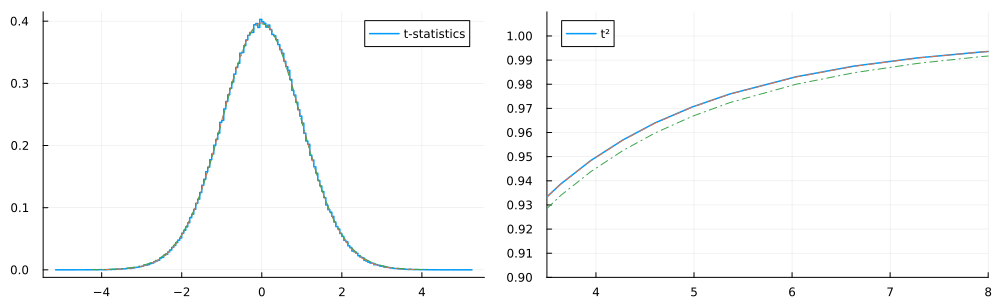

In [226]:
plot_tstats(distx=Normal(), m=20, disty=Normal(0, 2), n=40)

Normal(μ=0.0, σ=1.0)
m = 60
mean(distx) = 0.0
std(distx) = 1.0

Normal(μ=0.0, σ=2.0)
n = 20
mean(disty) = 0.0
std(disty) = 2.0

DFmin = 19.594624396563965
DFmax = 54.04601596426844
ecdfPval(0.05) = 0.050331


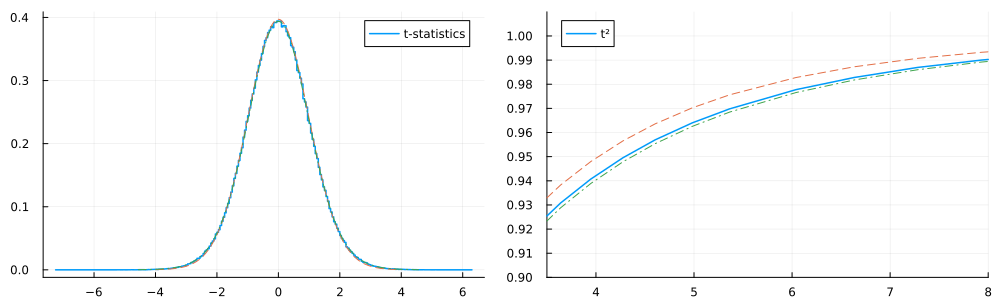

In [239]:
plot_tstats(distx=Normal(), m=60, disty=Normal(0, 2), n=20)

Normal(μ=0.0, σ=1.0)
m = 40
mean(distx) = 0.0
std(distx) = 1.0

Normal(μ=0.0, σ=2.0)
n = 20
mean(disty) = 0.0
std(disty) = 2.0

DFmin = 19.621972105472146
DFmax = 55.059013019418714
ecdfPval(0.05) = 0.050725


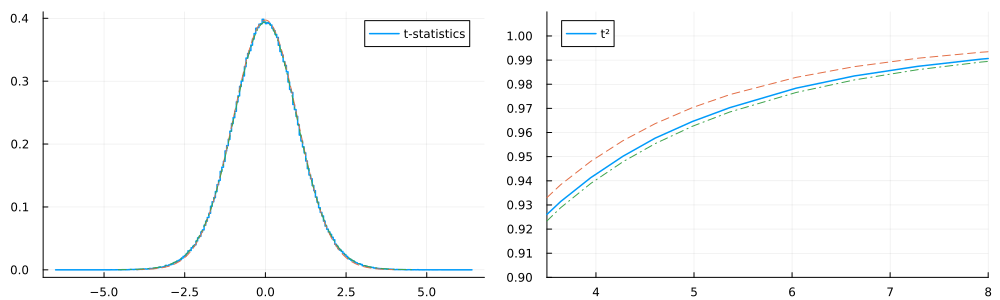

In [225]:
plot_tstats(distx=Normal(), m=40, disty=Normal(0, 2), n=20)

LogNormal(μ=0.0, σ=1.0)
m = 30
mean(distx) = 1.6487212707001282
std(distx) = 2.1611974158950877

LogNormal(μ=0.0, σ=1.0)
n = 30
mean(disty) = 1.6487212707001282
std(disty) = 2.1611974158950877

DFmin = 29.01757715666662
DFmax = 57.99999999994096
ecdfPval(0.05) = 0.039178


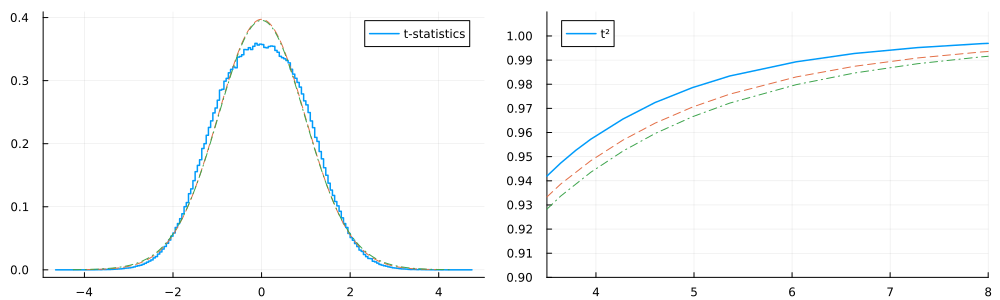

In [236]:
plot_tstats(distx=LogNormal(), m=30, disty=LogNormal(), n=30)

LogNormal(μ=0.0, σ=1.0)
m = 40
mean(distx) = 1.6487212707001282
std(distx) = 2.1611974158950877

LogNormal(μ=0.0, σ=1.0)
n = 20
mean(disty) = 1.6487212707001282
std(disty) = 2.1611974158950877

DFmin = 19.017661174704575
DFmax = 57.999999999953836
ecdfPval(0.05) = 0.050491


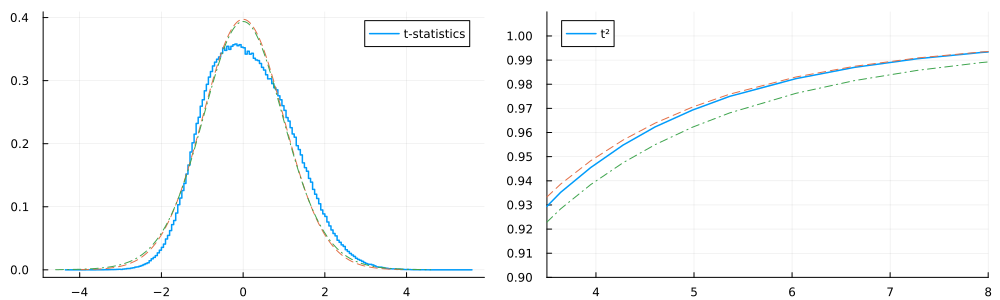

In [235]:
plot_tstats(distx=LogNormal(), m=40, disty=LogNormal(), n=20)

LogNormal(μ=0.0, σ=1.0)
m = 60
mean(distx) = 1.6487212707001282
std(distx) = 2.1611974158950877

LogNormal(μ=0.0, σ=1.0)
n = 20
mean(disty) = 1.6487212707001282
std(disty) = 2.1611974158950877

DFmin = 19.018708749647402
DFmax = 77.99999999975635
ecdfPval(0.05) = 0.065711


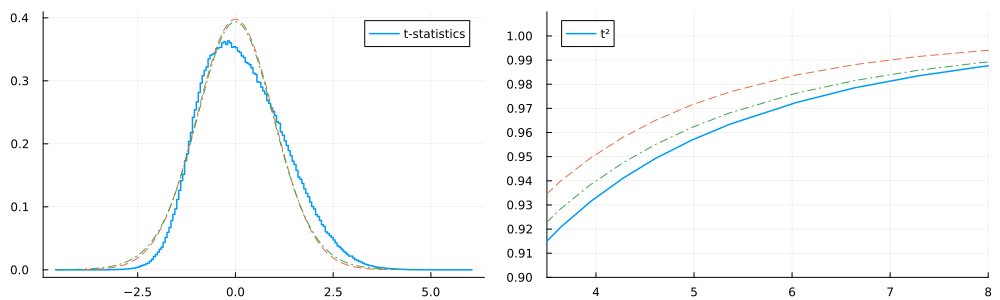

In [238]:
plot_tstats(distx=LogNormal(), m=60, disty=LogNormal(), n=20)

-1.6487212707001282 + LogNormal(μ=0.0, σ=1.0)
m = 20
mean(distx) = 0.0
std(distx) = 2.1611974158950877

-3.2974425414002564 + 2.0 LogNormal(μ=0.0, σ=1.0)
n = 40
mean(disty) = 0.0
std(disty) = 4.3223948317901755

DFmin = 19.05323159554499
DFmax = 57.9999999999981
ecdfPval(0.05) = 0.048086


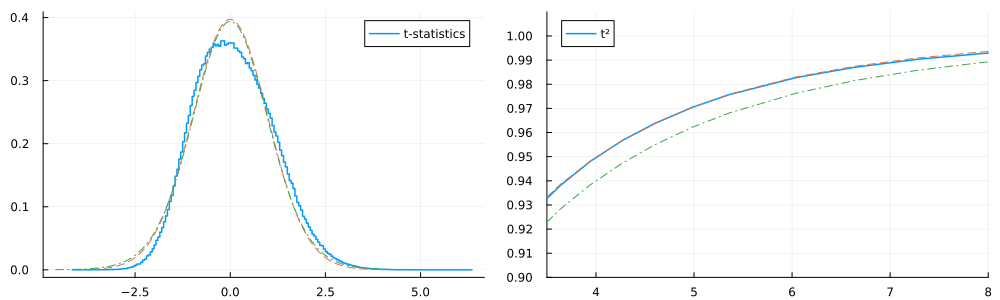

In [229]:
plot_tstats(distx=LogNormal()-mean(LogNormal()), m=20, disty=2(LogNormal()-mean(LogNormal())), n=40)

-1.6487212707001282 + LogNormal(μ=0.0, σ=1.0)
m = 30
mean(distx) = 0.0
std(distx) = 2.1611974158950877

-3.2974425414002564 + 2.0 LogNormal(μ=0.0, σ=1.0)
n = 30
mean(disty) = 0.0
std(disty) = 4.3223948317901755

DFmin = 29.00513989541241
DFmax = 57.9999999999781
ecdfPval(0.05) = 0.070823


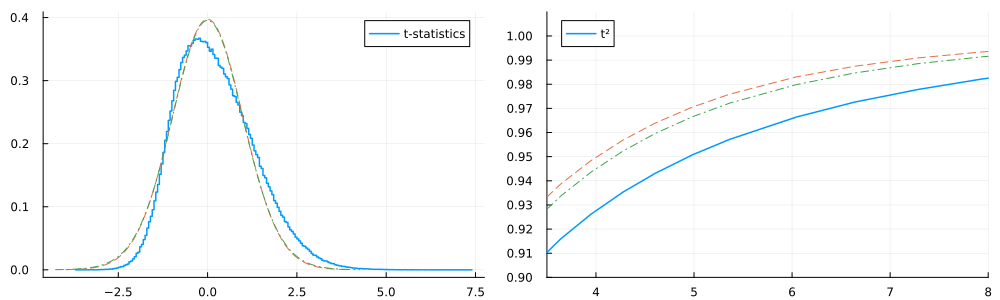

In [231]:
plot_tstats(distx=LogNormal()-mean(LogNormal()), m=30, disty=2(LogNormal()-mean(LogNormal())), n=30)

-1.6487212707001282 + LogNormal(μ=0.0, σ=1.0)
m = 40
mean(distx) = 0.0
std(distx) = 2.1611974158950877

-3.2974425414002564 + 2.0 LogNormal(μ=0.0, σ=1.0)
n = 20
mean(disty) = 0.0
std(disty) = 4.3223948317901755

DFmin = 19.002413273618597
DFmax = 57.99999999215057
ecdfPval(0.05) = 0.099577


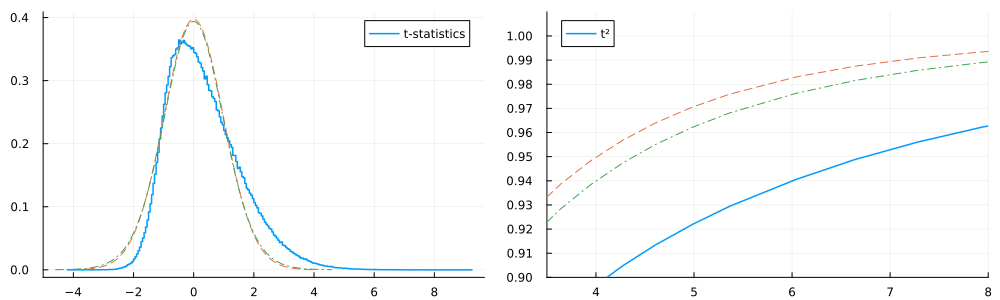

In [230]:
plot_tstats(distx=LogNormal()-mean(LogNormal()), m=40, disty=2(LogNormal()-mean(LogNormal())), n=20)

-1.6487212707001282 + LogNormal(μ=0.0, σ=1.0)
m = 300
mean(distx) = 0.0
std(distx) = 2.1611974158950877

-3.2974425414002564 + 2.0 LogNormal(μ=0.0, σ=1.0)
n = 300
mean(disty) = 0.0
std(disty) = 4.3223948317901755

DFmin = 300.1006784387172
DFmax = 597.9999986677186
ecdfPval(0.05) = 0.055043


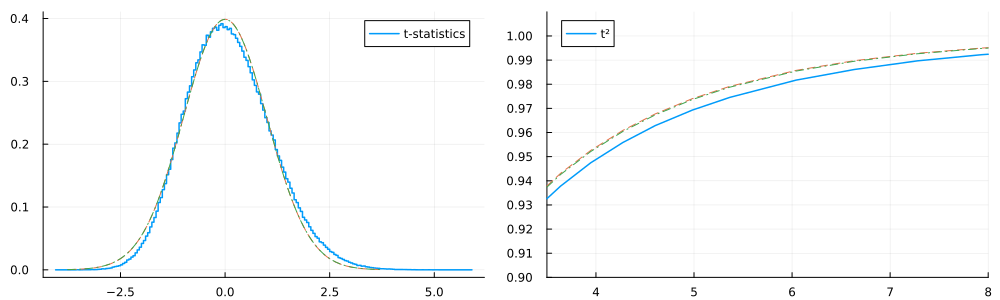

In [233]:
plot_tstats(distx=LogNormal()-mean(LogNormal()), m=300, disty=2(LogNormal()-mean(LogNormal())), n=300)

-1.6487212707001282 + LogNormal(μ=0.0, σ=1.0)
m = 400
mean(distx) = 0.0
std(distx) = 2.1611974158950877

-3.2974425414002564 + 2.0 LogNormal(μ=0.0, σ=1.0)
n = 200
mean(disty) = 0.0
std(disty) = 4.3223948317901755

DFmin = 199.39604920755247
DFmax = 597.9991807265222
ecdfPval(0.05) = 0.062403


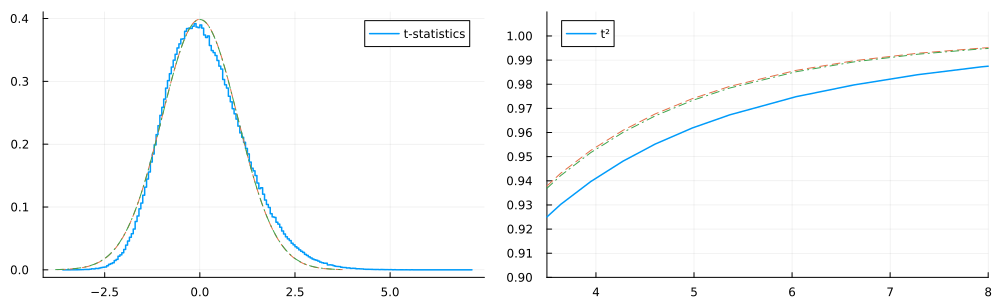

In [234]:
plot_tstats(distx=LogNormal()-mean(LogNormal()), m=400, disty=2(LogNormal()-mean(LogNormal())), n=200)

Normal(μ=2.0, σ=1.0)
m = 20
mean(distx) = 2.0
std(distx) = 1.0

Normal(μ=2.8, σ=1.0)
n = 40
mean(disty) = 2.8
std(disty) = 1.0

DFmin = 21.926566435560154
DFmax = 57.99999999786163
ecdfPval(0.05) = 0.811825


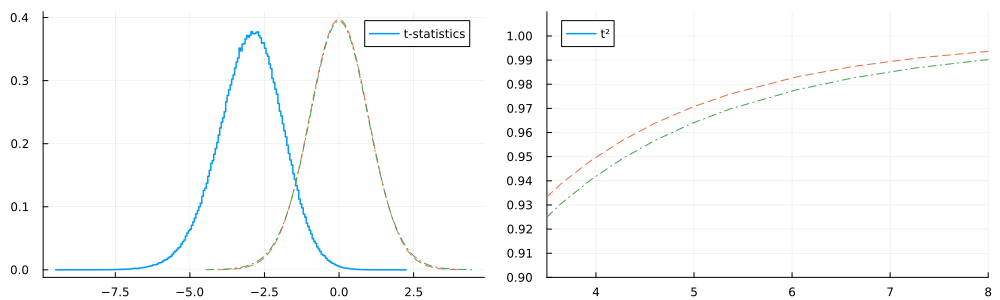

In [205]:
plot_tstats(distx=Normal(2), m=20, disty=Normal(2.8), n=40)

LogNormal(μ=0.0, σ=1.0)
m = 20
mean(distx) = 1.6487212707001282
std(distx) = 2.1611974158950877

1.7289579327160702 + LogNormal(μ=0.0, σ=1.0)
n = 40
mean(disty) = 3.377679203416198
std(disty) = 2.1611974158950877

DFmin = 19.008853898306445
DFmax = 57.99999999989957
ecdfPval(0.05) = 0.821842


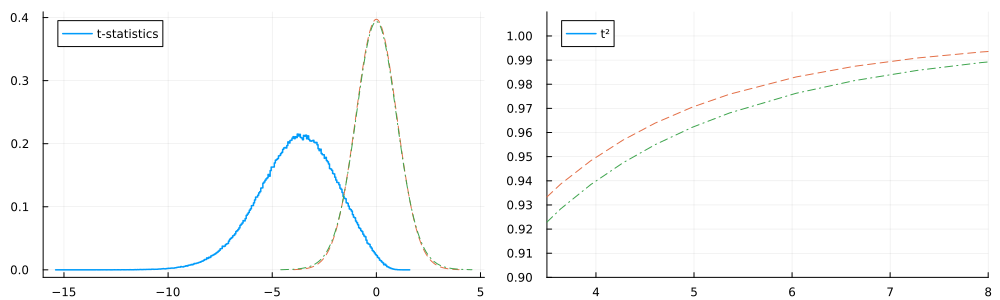

In [227]:
plot_tstats(distx=LogNormal(), m=20, disty=LogNormal()+0.8*std(LogNormal()), n=40)